In [1]:
import os

import mysql.connector
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Sql_functions import read_query



In [2]:
query = 'select *from customers;'
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur
4,C-2023-100-102,Navya,Dash,NavyaDash_5@zmail.com,+917644200850,70/782\nBahl Road,Kerala
...,...,...,...,...,...,...,...
195,C-2023-100-95,Taran,Din,TaranDin_12@zmail.com,6834976149,H.No. 18\nArora Marg,Karnataka
196,C-2023-100-96,Bhamini,Gara,BhaminiGara_1@zmail.com,+913844979166,H.No. 22\nBrahmbhatt Zila,Chhattisgarh
197,C-2023-100-97,Hunar,Kothari,HunarKothari_13@zmail.com,+910694175434,"84, Madan Chowk",Kerala
198,C-2023-100-98,Riaan,Wali,RiaanWali_11@zmail.com,6570105054,98\nComar Zila,Telangana


In [3]:
load_dotenv()

user = os.getenv('USER')
password = os. getenv('PASSWORD')
host = os.getenv('HOST')
database= 'swiftmarket'

In [4]:
connection = mysql.connector.connect(user=user,
                                      password=password,
                                      host=host,
                                      database=database)

cursor = connection.cursor()

In [5]:
connection.is_connected()

True

In [6]:
# query = '''show tables'''
# cursor.execute(query)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

In [7]:
# Dimension tables: all tables contianing primary keys abd connected to fact tables
# Fact tables :e.g sales data


# query = '''select * from salesdata limit 5;'''
# cursor.execute(query)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

In [8]:
# cursor.column_names

In [9]:
# pd.DataFrame(data=rows, columns=cursor.column_names)

In [10]:
# def read_query(query):
#    cursor.execute(query)
#    rows = cursor.fetchall()
#    return pd.DataFrame(data=rows, columns=cursor.column_names) 


In [11]:
query = '''select * from customers limit 5;'''
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur
4,C-2023-100-102,Navya,Dash,NavyaDash_5@zmail.com,+917644200850,70/782\nBahl Road,Kerala


In [12]:
query = '''select s. saledate, c.firstname, s. totalprice
from salesdata s
join customers c
on s. customerid= c.customerid
order by s. saledate;'''
read_query(query)

,saledate,firstname,totalprice
0,2023-01-01,Miraan,8630.00
1,2023-01-01,Eva,159724.00
2,2023-01-01,Kashvi,139084.00
3,2023-01-01,Shalv,208626.00
4,2023-01-01,Heer,79387.00
...,...,...,...
11996,2023-12-30,Azad,111075.00
11997,2023-12-30,Vidur,58785.00
11998,2023-12-30,Reyansh,9599.00
11999,2023-12-30,Sahil,99402.00


In [13]:
query = 'show tables ;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


JION TABLES

In [14]:
query = 'select * from salesdata limit 3;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [15]:
query = """select s. customerid, c. firstname, s. saledate, s. totalprice  
from salesdata s
join customers c
on s. customerid = c. customerid
limit 5;"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [16]:
query = """
select t. customerid, c. firstname, t. expenditure
from
(select customerid,
sum(totalprice) as expenditure 
from salesdata
group by customerid) t 
join customers c
on t. customerid = c.customerid
order by t. expenditure desc
limit 10;"""

top_annual_customers = read_query(query)

In [17]:
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [18]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [41]:
top_annual_customers['expenditure'] = top_annual_customers['expenditure'].astype(float)

In [42]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   10 non-null     object 
 1   firstname    10 non-null     object 
 2   expenditure  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [43]:
customers_names = top_annual_customers['firstname'].values

In [44]:
customers_names

array(['Veer', 'Priyansh', 'Riya', 'Vanya', 'Dhruv', 'Tarini', 'Yuvraj ',
       'Rhea', 'Darshit', 'Prerak'], dtype=object)

In [21]:
customer_exp = top_annual_customers['expenditure'].values

In [22]:
customer_name = top_annual_customers['firstname']. values

In [34]:
customer_exp

array([13016064., 12629337., 12599608., 12455437., 12280916., 12130487.,
       11868602., 11704275., 11520699., 11442527.])

Text(0, 0.5, 'Expenditure')

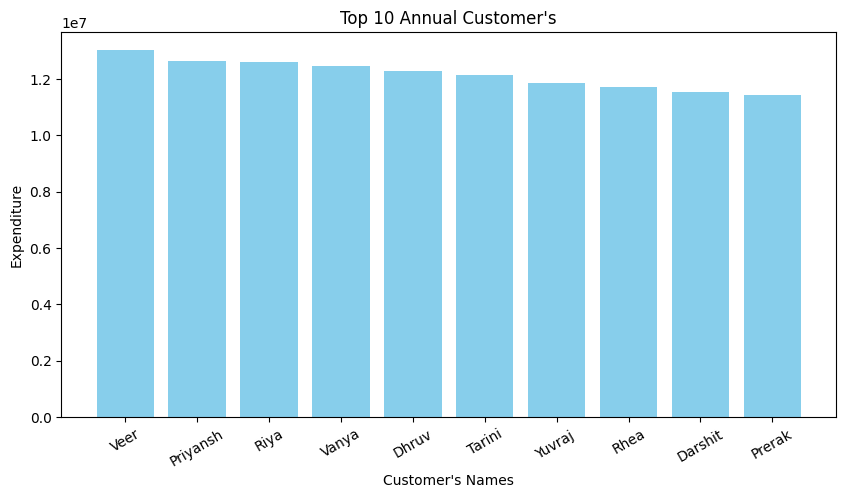

In [53]:
plt.figure(figsize=(10,5))
plt.bar(height= customer_exp, x=customers_names,color="skyblue")
plt.title("Top 10 Annual Customer's")

plt.xticks(rotation=30)
plt.xlabel("Customer's Names")
plt.ylabel("Expenditure")

In [24]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [25]:
query ='select * from salesdata limit 10;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [26]:
query = ''' select
    monthname(s.saledate) as monthname,
      e.firstname,
      sum(s. totalprice) as totalsales
from salesdata s
      join employees e
      on s.employeeid=e.employeeid
 where monthname (saledate)='January'
 group by  monthname(s.saledate),   e.firstname
 order by totalsales desc
 limit 10;'''

month_total_price =read_query(query)

In [27]:
month_total_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   monthname   10 non-null     object
 1   firstname   10 non-null     object
 2   totalsales  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [28]:
month_price = month_total_price['totasales'] = month_total_price['totalsales'].astype(float)

In [29]:
customer_name = top_annual_customers['firstname']. values

In [30]:
month_total_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   monthname   10 non-null     object 
 1   firstname   10 non-null     object 
 2   totalsales  10 non-null     object 
 3   totasales   10 non-null     float64
dtypes: float64(1), object(3)
memory usage: 452.0+ bytes


<BarContainer object of 10 artists>

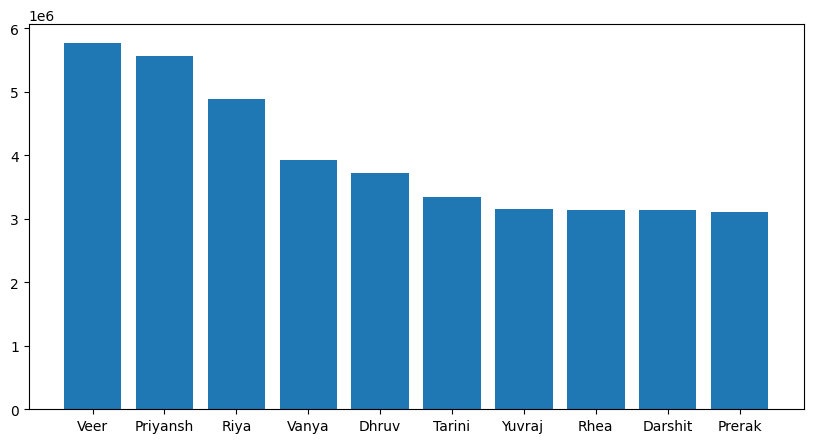

In [31]:
plt.figure(figsize=(10,5))
plt.bar(height=month_price,x=customer_name)

In [54]:
query = 'select * from salesdata limit 10;'
read_query(query=query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [55]:
query ='''select monthname(s.saledate) ,e.firstname ,sum(s.TotalPrice) as totalsales
from salesdata s
join employees e
on s.EmployeeID = e.EmployeeID
where monthname(s.saledate) ="january"
group by monthname(s.saledate),e.firstname
order by totalsales desc
limit 10;'''

df = read_query(query=query)

In [56]:
df.info

<bound method DataFrame.info of   monthname(s.saledate) firstname  totalsales
0               January    Bhavin  5775952.00
1               January    Nitara  5567036.00
2               January      Myra  4888628.00
3               January     Renee  3924716.00
4               January     Shray  3719152.00
5               January    Yuvaan  3348039.00
6               January     Anika  3152408.00
7               January     Kiaan  3136727.00
8               January    Yasmin  3135779.00
9               January     Hiran  3104523.00>

In [57]:
firstname =df['firstname'].values

In [58]:
df['totalsales'] =df['totalsales'].values.astype(float)
df['totalsales'].values

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

<BarContainer object of 10 artists>

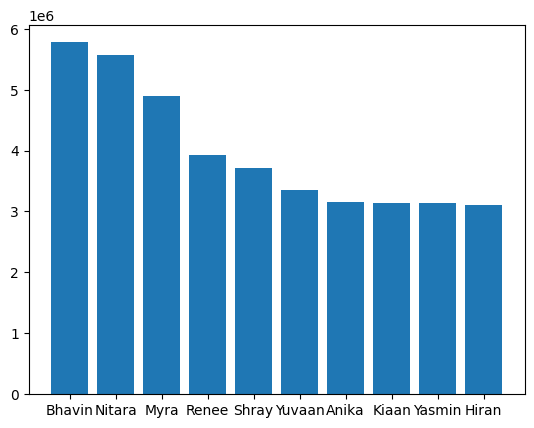

In [60]:
plt
plt.bar(height=df['totalsales'].values , x= firstname )

In [61]:
cmap_value =np.linspace(0.3,1,10)
cmap = plt.cm.BuGn(cmap_value)

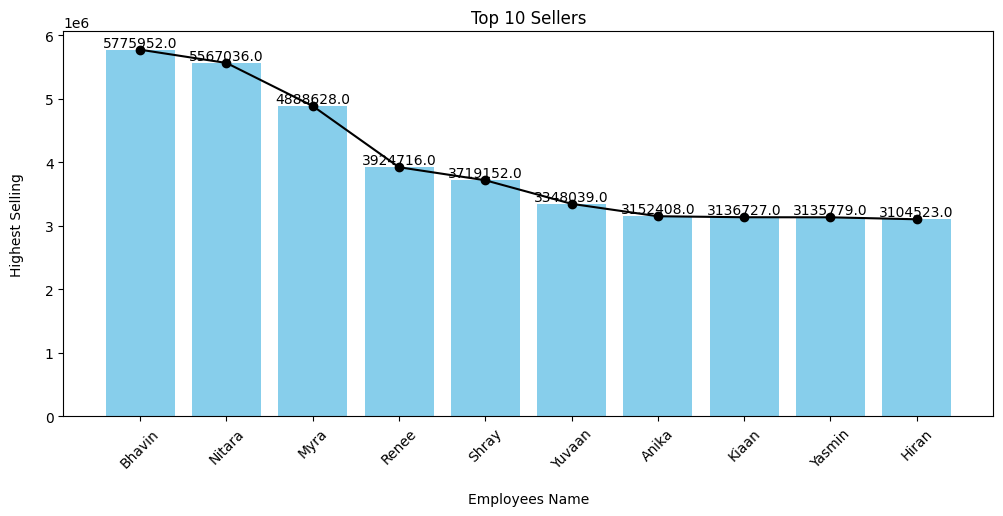

In [78]:
plt.figure(figsize=(12,5))
plt.plot(firstname,df['totalsales'].values,marker = 'o',color = 'black')
plt.bar(height=df['totalsales'].values , x= firstname , color ='skyblue' )

plt.title('Top 10 Sellers')

plt.xlabel('Employees Name',labelpad=15)
plt.ylabel("Highest Selling",labelpad=15)

plt.xticks(rotation=45)

for i in range(len(firstname)):
    
    plt.annotate(text=df['totalsales'].values[i],xy=(i,df['totalsales'].values[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom') 

plt.show()

In [67]:
query ='''select monthname(s.saledate) ,e.firstname ,sum(s.TotalPrice) as totalsales
from salesdata s
join employees e
on s.EmployeeID = e.EmployeeID
where monthname(s.saledate) ="january"
group by monthname(s.saledate),e.firstname
order by totalsales desc
limit 10;'''

df = read_query(query=query)
df

,monthname(s.saledate),firstname,totalsales
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [68]:
firstname = df['firstname'].values

In [69]:
df['totalsales'] = df['totalsales'].astype(float)
H_salary = df['totalsales'].values

H_salary

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

<BarContainer object of 10 artists>

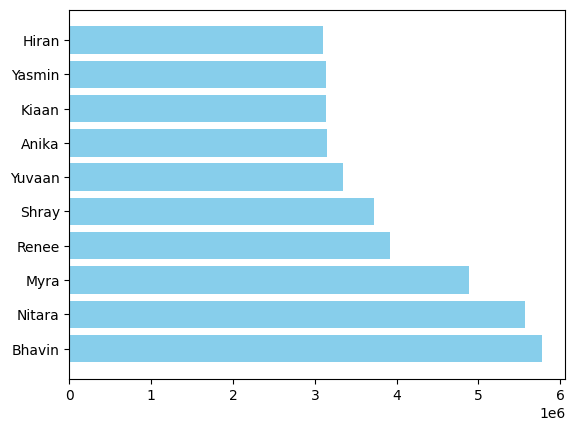

In [79]:
plt.barh(width= H_salary,y=firstname,color='skyblue')

In [ ]:
query ='''select monthname(s.saledate) ,e.firstname ,sum(s.TotalPrice) as totalsales
from salesdata s
join employees e
on s.EmployeeID = e.EmployeeID
where monthname(s.saledate) ="january"
group by monthname(s.saledate),e.firstname
order by totalsales
limit 10;'''

In [80]:
df = read_query(query=query)
df

,monthname(s.saledate),firstname,totalsales
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [81]:
firstname = df['firstname'].values
df['totalsales'] = df['totalsales'].astype(float)
H_salary = df['totalsales'].values


In [83]:
cam_value = np.linspace(0.3,1,10)
cm = plt.cm.YlGn(cam_value)

In [86]:
f_title = {'family':'serif','size':'25','color':'black'}
f_xlable = {'family':'serif','size':'15','color':'skyblue'}
f_ylable = {'family':'serif','size':'15','color':'black'}

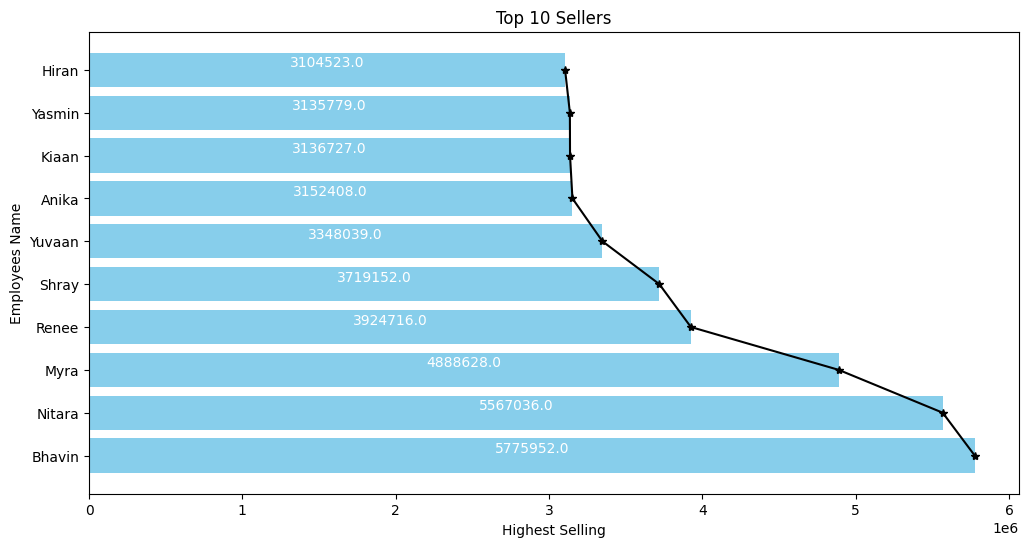

In [89]:

plt.figure(figsize=(12,6))

plt.plot(H_salary,firstname,color='black',marker='*')
plt.barh(width= H_salary,y=firstname,color='skyblue')
plt.title('Top 10 Sellers')
plt.xlabel('Highest Selling')
plt.ylabel('Employees Name')

for i in range(len(H_salary)):
    
    plt.annotate(text=H_salary[i],xy=(H_salary[i]/2,i),color='white',
                 horizontalalignment='center',
                 verticalalignment='bottom') 

plt.show()

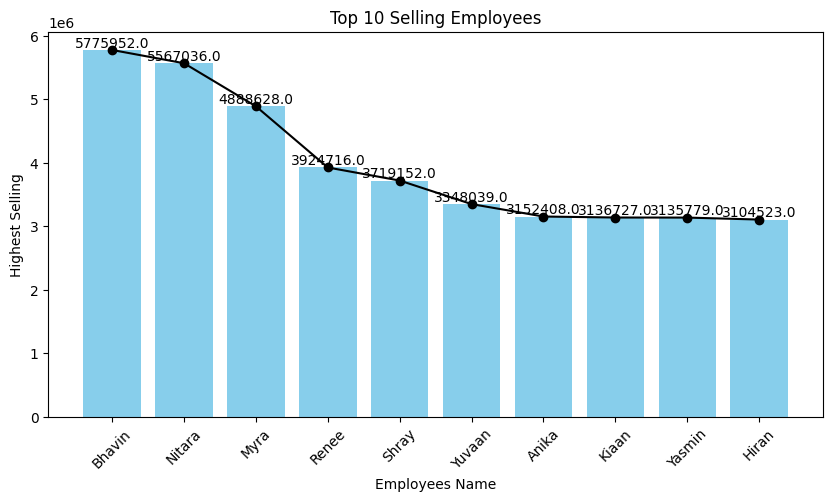

In [94]:
font = {'family':'serif','color':'darkred','weight':'normal','size':16}
fonty = {'family':'serif','color':'darkgreen','size':16}

plt.figure(figsize=(10,5))
plt.plot(firstname,H_salary,marker = 'o',color = 'black')
plt.bar(height=H_salary , x= firstname , color ="skyblue" )


plt.title('Top 10 Selling Employees')

plt.xlabel('Employees Name')
plt.ylabel("Highest Selling")

plt.xticks(rotation=45)

for i in range(len(firstname)):
    
    plt.annotate(text=H_salary[i],xy=(i,H_salary[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom') 

plt.show()